In [105]:
import pandas as pd

In [106]:
df = pd.read_csv('datasets/us-patent-phrase-to-phrase-matching/train.csv')
df.head()

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


In [107]:
df.describe(include='object'), df['context'].unique()

(                      id                       anchor       target context
 count              36473                        36473        36473   36473
 unique             36473                          733        29340     106
 top     37d61fd2272659b1  component composite coating  composition     H01
 freq                   1                          152           24    2186,
 array(['A47', 'A61', 'A62', 'C01', 'F16', 'F24', 'F28', 'H01', 'H04',
        'B23', 'B41', 'D03', 'E03', 'C08', 'D01', 'D21', 'C07', 'A45',
        'B01', 'B08', 'G04', 'G06', 'B65', 'G16', 'G01', 'A41', 'C23',
        'F23', 'B25', 'A63', 'B28', 'B63', 'F04', 'B60', 'B32', 'C09',
        'C02', 'G03', 'C10', 'B61', 'C21', 'F42', 'A23', 'C11', 'B29',
        'F02', 'B62', 'B64', 'E21', 'B24', 'B22', 'H05', 'B27', 'E04',
        'B21', 'D06', 'C04', 'B05', 'G02', 'H03', 'C06', 'G11', 'C12',
        'E02', 'F15', 'A46', 'B66', 'G07', 'G08', 'C22', 'B44', 'A01',
        'F03', 'C25', 'F22', 'G05', 'G21', 'B07', '

In [108]:
df['input'] = 'TEXT1: ' + df.context + '; TEXT2: ' + df.target + '; ANC1: ' + df.anchor

In [109]:
df.head()

,id,anchor,target,context,score,input
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,TEXT1: A47; TEXT2: abatement of pollution; ANC...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,TEXT1: A47; TEXT2: act of abating; ANC1: abate...
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,TEXT1: A47; TEXT2: active catalyst; ANC1: abat...
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,TEXT1: A47; TEXT2: eliminating process; ANC1: ...
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,TEXT1: A47; TEXT2: forest region; ANC1: abatement


In [110]:
from datasets import Dataset, DatasetDict

In [111]:
ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input'],
    num_rows: 36473
})

>But we can't pass the texts directly into a model. A deep learning model expects numbers as inputs, not English sentences! So we need to do two things:

>Tokenization: Split each text up into words (or actually, as we'll see, into tokens)
>Numericalization: Convert each word (or token) into a number.

In [112]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model_nm = 'distilbert/distilbert-base-uncased'


In [113]:
tokz = AutoTokenizer.from_pretrained(model_nm, use_fast=False)

In [114]:
tokz.tokenize("G'day folks, I'm Jeremy from fast.ai!")

['g',
 "'",
 'day',
 'folks',
 ',',
 'i',
 "'",
 'm',
 'jeremy',
 'from',
 'fast',
 '.',
 'ai',
 '!']

In [115]:
tokz.tokenize("A platypus is an ornithorhynchus anatinus.")


['a',
 'pl',
 '##at',
 '##yp',
 '##us',
 'is',
 'an',
 'or',
 '##ni',
 '##thor',
 '##hy',
 '##nch',
 '##us',
 'ana',
 '##tin',
 '##us',
 '.']

In [116]:
def tok_func(x): return tokz(x['input'])
tok_ds = ds.map(tok_func, batched=True)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [117]:
type(tok_ds), tok_ds[0]

(datasets.arrow_dataset.Dataset,
 {'id': '37d61fd2272659b1',
  'anchor': 'abatement',
  'target': 'abatement of pollution',
  'context': 'A47',
  'score': 0.5,
  'input': 'TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement',
  'input_ids': [101,
   3793,
   2487,
   1024,
   1037,
   22610,
   1025,
   3793,
   2475,
   1024,
   19557,
   18532,
   4765,
   1997,
   10796,
   1025,
   2019,
   2278,
   2487,
   1024,
   19557,
   18532,
   4765,
   102],
  'attention_mask': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1]})

In [118]:
tok_ds[0]['input'], tok_ds[0]['input_ids']

('TEXT1: A47; TEXT2: abatement of pollution; ANC1: abatement',
 [101,
  3793,
  2487,
  1024,
  1037,
  22610,
  1025,
  3793,
  2475,
  1024,
  19557,
  18532,
  4765,
  1997,
  10796,
  1025,
  2019,
  2278,
  2487,
  1024,
  19557,
  18532,
  4765,
  102])

So, what are those IDs and where do they come from? The secret is that there's a list called vocab in the tokenizer which contains a unique integer for every possible token string. We can look them up like this, for instance to find the token for the word "of":

In [119]:
tokz.vocab.keys()

odict_keys(['[PAD]', '[unused0]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[unused25]', '[unused26]', '[unused27]', '[unused28]', '[unused29]', '[unused30]', '[unused31]', '[unused32]', '[unused33]', '[unused34]', '[unused35]', '[unused36]', '[unused37]', '[unused38]', '[unused39]', '[unused40]', '[unused41]', '[unused42]', '[unused43]', '[unused44]', '[unused45]', '[unused46]', '[unused47]', '[unused48]', '[unused49]', '[unused50]', '[unused51]', '[unused52]', '[unused53]', '[unused54]', '[unused55]', '[unused56]', '[unused57]', '[unused58]', '[unused59]', '[unused60]', '[unused61]', '[unused62]', '[unused63]', '[unused64]', '[unused65]', '[unused66]', '[unused67]', '[unused68]', '[unused69]', '[unused7

Finally, we need to prepare our labels. Transformers always assumes that your labels has the column name labels, but in our dataset it's currently score. Therefore, we need to rename it:

In [120]:
tok_ds = tok_ds.rename_columns({'score':'labels'})

In [121]:
eval_df = pd.read_csv("datasets/us-patent-phrase-to-phrase-matching/test.csv")
eval_df.describe()

,id,anchor,target,context
count,36,36,36,36
unique,36,34,36,29
top,4112d61851461f60,el display,inorganic photoconductor drum,G02
freq,1,2,1,3


In [122]:
dds = tok_ds.train_test_split(0.25, seed=42)
dds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'attention_mask'],
        num_rows: 9119
    })
})

In [123]:
eval_df['input'] = 'TEXT1: ' + eval_df.context + '; TEXT2: ' + eval_df.target + '; ANC1: ' + eval_df.anchor
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

In [124]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

In [125]:
housing['data']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [126]:
housing['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [127]:
housing = housing['data'].join(housing['target']).sample(1000, random_state=52)

In [128]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7506,3.0550,37.0,5.152778,1.048611,729.0,5.062500,33.92,-118.28,1.054
4720,3.0862,35.0,4.697897,1.055449,1159.0,2.216061,34.05,-118.37,3.453
12888,2.5556,24.0,4.864905,1.129222,1631.0,2.395007,38.66,-121.35,1.057
13344,3.0057,32.0,4.212687,0.936567,1378.0,5.141791,34.05,-117.64,0.969
7173,1.9083,42.0,3.888554,1.039157,1535.0,4.623494,34.05,-118.19,1.192
...,...,...,...,...,...,...,...,...,...
10535,5.5677,4.0,5.921914,1.120907,834.0,2.100756,33.50,-117.70,2.454
3029,2.9952,44.0,5.534296,1.055355,2140.0,2.575211,35.13,-119.47,0.638
7985,2.5068,26.0,4.240693,1.067394,4066.0,2.609756,33.86,-118.16,1.563
13724,1.4480,37.0,4.327434,1.026549,1316.0,3.882006,34.06,-117.19,0.728


In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
np.set_printoptions(precision=2, suppress=True)

In [131]:
np.corrcoef(housing, rowvar=False)

array([[ 1.  , -0.12,  0.43, -0.08,  0.01, -0.07, -0.12,  0.04,  0.68],
       [-0.12,  1.  , -0.17, -0.06, -0.31,  0.  ,  0.03, -0.13,  0.12],
       [ 0.43, -0.17,  1.  ,  0.76, -0.09, -0.07,  0.12, -0.03,  0.21],
       [-0.08, -0.06,  0.76,  1.  , -0.08, -0.07,  0.09,  0.  , -0.04],
       [ 0.01, -0.31, -0.09, -0.08,  1.  ,  0.16, -0.15,  0.13,  0.  ],
       [-0.07,  0.  , -0.07, -0.07,  0.16,  1.  , -0.16,  0.17, -0.27],
       [-0.12,  0.03,  0.12,  0.09, -0.15, -0.16,  1.  , -0.93, -0.16],
       [ 0.04, -0.13, -0.03,  0.  ,  0.13,  0.17, -0.93,  1.  , -0.03],
       [ 0.68,  0.12,  0.21, -0.04,  0.  , -0.27, -0.16, -0.03,  1.  ]])

In [132]:
np.corrcoef(housing['HouseAge'], housing['MedHouseVal'])

array([[1.  , 0.12],
       [0.12, 1.  ]])

In [133]:
np.corrcoef(housing.MedInc, housing.MedHouseVal)

array([[1.  , 0.68],
       [0.68, 1.  ]])

In [134]:
def corr(x,y): return np.corrcoef(x,y)[0,1]

In [135]:
corr(housing['HouseAge'], housing['MedHouseVal'])

np.float64(0.11658535550677968)

In [136]:
def show_corr(df, a, b):
    x,y = df[a],df[b]
    plt.scatter(x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr(x, y):.2f}')

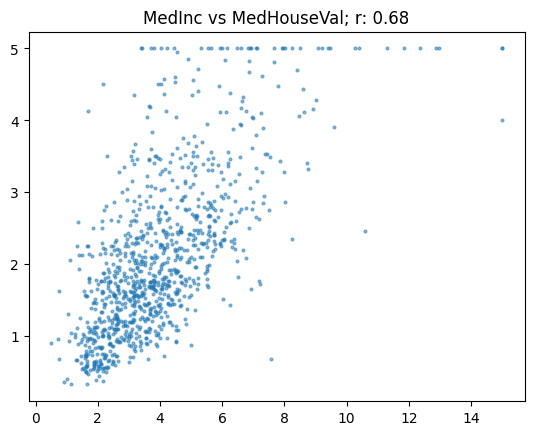

In [137]:
show_corr(housing, 'MedInc', 'MedHouseVal')

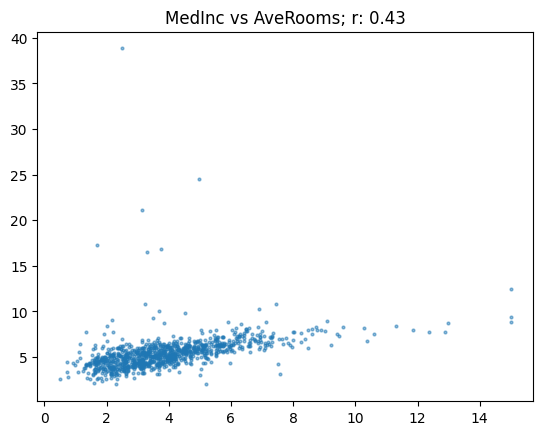

In [138]:
show_corr(housing, 'MedInc', 'AveRooms')


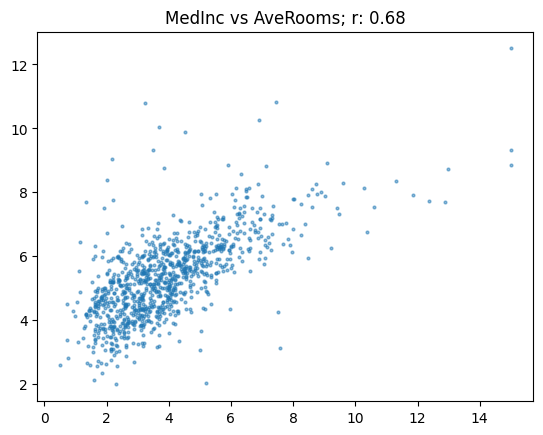

In [139]:
subset = housing[housing.AveRooms<15]
show_corr(subset, 'MedInc', 'AveRooms')

In [140]:
from transformers import TrainingArguments,Trainer
import transformers

In [141]:
bs = 128
epochs = 4
lr = 8e-5

In [143]:
# Training configurations

args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none')

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
transformers.__version__

'4.56.1'